In [30]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Análise Inicial

In [31]:
path = "../data/raw/01_supermercados.csv"

df = pd.read_csv(path, sep=',', encoding='latin-1')

print(f'Tamanho da base: {df.shape[0]} registros e {df.shape[1]} variáveis')

print(f'Variáveis: {list(df.columns)}')

print(df.dtypes)

df.tail(10)

Tamanho da base: 9994 registros e 21 variáveis
Variáveis: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [32]:
dados_nulos = df.isnull().sum()


tabela_nulos = pd.DataFrame({
    'Nome da Variável': dados_nulos.index,
    'Quantidade de Dados Nulos': dados_nulos.values
})


print(tabela_nulos)


   Nome da Variável  Quantidade de Dados Nulos
0            Row ID                          0
1          Order ID                          0
2        Order Date                          0
3         Ship Date                          0
4         Ship Mode                          0
5       Customer ID                          0
6     Customer Name                          0
7           Segment                          0
8           Country                          0
9              City                          0
10            State                          0
11      Postal Code                          0
12           Region                          0
13       Product ID                          0
14         Category                          0
15     Sub-Category                          0
16     Product Name                          0
17            Sales                          0
18         Quantity                          0
19         Discount                          0
20           

# Limpeza dos Dados

In [33]:
# Conversão de datas
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Verificar se houve problemas na conversão de datas
print("Datas não convertidas (nulos após conversão):")
print(df[['Order Date', 'Ship Date']].isnull().sum())

# Remover duplicatas
duplicatas = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicatas}")
df = df.drop_duplicates()

# Verificar categorias inconsistentes
categorias = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
for coluna in categorias:
    print(f"\nValores únicos em {coluna}:")
    print(df[coluna].value_counts())

# Validação de Country (esperado: United States)
print("\nValores únicos para 'Country':")
print(df['Country'].unique())

# Analisar outliers em Discount (esperado entre 0 e 1)
print("\nDescontos fora do padrão (esperado entre 0 e 0.8):")
print(df[df['Discount'] > 0.8])

# Verificar valores negativos inesperados (excluindo Profit, que pode ser negativo)
print("\nValores negativos:")
print(df[(df['Sales'] < 0) | (df['Quantity'] < 0) | (df['Postal Code'] < 0)])

# ✔️ Resumo após limpeza
print("\nResumo dos dados após limpeza:")
print(df.info())

Datas não convertidas (nulos após conversão):
Order Date    0
Ship Date     0
dtype: int64
Número de registros duplicados: 0

Valores únicos em Ship Mode:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Valores únicos em Segment:
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Valores únicos em Country:
Country
United States    9994
Name: count, dtype: int64

Valores únicos em Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Valores únicos em Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Valores únicos em Sub-Category:
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Table

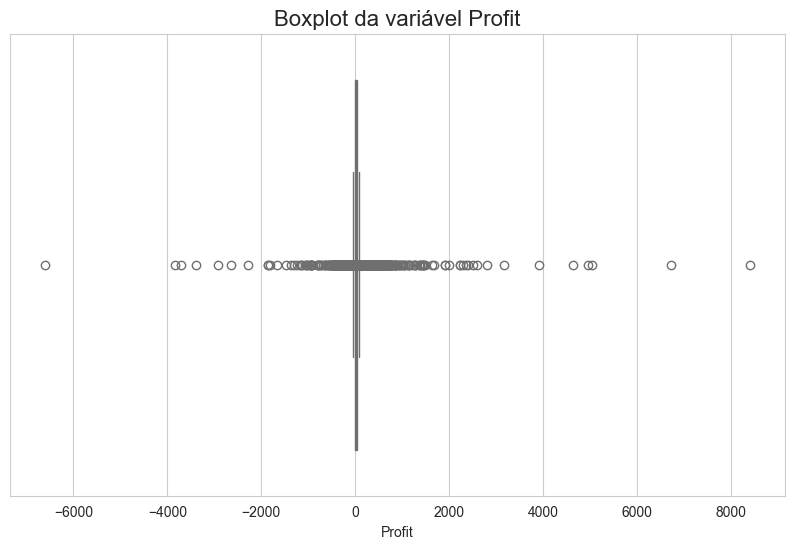

In [34]:
# Box-plot para verificar outliers em Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'], color='skyblue')
plt.title('Boxplot da variável Profit', fontsize=16)
plt.xlabel('Profit')
plt.show()

## Justificativas Limpeza de Dados
- verificamos valores nulos e não havia nenhum
- verificamos duplicatas e nao havia nenhum
- verificamos inconscistencias nos dados e não encontramos nenhuma
- Verificamos outliers e identificamos a presença na variável Profit, porém decidimos não excluir, pois queremos analisar os fatores que levaram a um lucro muito alto, muito baixo ou até mesmo a um prejuízo elevado.
- verificamos valores negativos em variáveis númericas que não podem ser negativas e não encontramos nenhum

### Justificava por ter alterado Datas para Datetime
Converter as colunas de datas para o tipo datetime é essencial, pois permite realizar operações e análises temporais. Com datetime, é possível calcular prazos (como o tempo de entrega), filtrar registros por ano, mês ou dia, e gerar análises sazonais ou de tendências. Além disso, facilita ordenações cronológicas, agrupamentos e evita erros que ocorreriam se as datas fossem tratadas como texto. Isso torna o processo de análise de dados mais eficiente, preciso e flexível.

# Análise Estatística e Visual


In [35]:
estatisticas = df[["Sales", "Quantity", "Discount", "Profit"]].describe()

# Renomear os índices (linhas) para português
estatisticas.rename(index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º_quartil',
    '50%': 'mediana',
    '75%': '3º_quartil',
    'max': 'máximo'
}, inplace=True)

print(estatisticas)

                      Sales     Quantity     Discount       Profit
contagem        9994.000000  9994.000000  9994.000000  9994.000000
média            229.858001     3.789574     0.156203    28.656896
desvio_padrão    623.245101     2.225110     0.206452   234.260108
mínimo             0.444000     1.000000     0.000000 -6599.978000
1º_quartil        17.280000     2.000000     0.000000     1.728750
mediana           54.490000     3.000000     0.200000     8.666500
3º_quartil       209.940000     5.000000     0.200000    29.364000
máximo         22638.480000    14.000000     0.800000  8399.976000


In [36]:
# Lista de variáveis que você quer analisar
variaveis = ["Sales", "Quantity", "Discount", "Profit"]

for var in variaveis:
    print(f"\nAnálise da variável: {var}")
    print("-" * 40)
    
    media = df[var].mean()
    mediana = df[var].median()
    moda = df[var].mode().values
    desvio = df[var].std()
    variancia = df[var].var()
    minimo = df[var].min()
    maximo = df[var].max()
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    amplitude = maximo - minimo

    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda}")
    print(f"Desvio Padrão: {desvio:.2f}")
    print(f"Variância: {variancia:.2f}")
    print(f"Mínimo: {minimo}")
    print(f"Máximo: {maximo}")
    print(f"Amplitude: {amplitude}")
    print(f"1º Quartil (Q1): {q1}")
    print(f"3º Quartil (Q3): {q3}")
    print(f"Intervalo Interquartil (IQR): {iqr}")


Análise da variável: Sales
----------------------------------------
Média: 229.86
Mediana: 54.49
Moda: [12.96]
Desvio Padrão: 623.25
Variância: 388434.46
Mínimo: 0.444
Máximo: 22638.48
Amplitude: 22638.036
1º Quartil (Q1): 17.28
3º Quartil (Q3): 209.94
Intervalo Interquartil (IQR): 192.66

Análise da variável: Quantity
----------------------------------------
Média: 3.79
Mediana: 3.00
Moda: [3]
Desvio Padrão: 2.23
Variância: 4.95
Mínimo: 1
Máximo: 14
Amplitude: 13
1º Quartil (Q1): 2.0
3º Quartil (Q3): 5.0
Intervalo Interquartil (IQR): 3.0

Análise da variável: Discount
----------------------------------------
Média: 0.16
Mediana: 0.20
Moda: [0.]
Desvio Padrão: 0.21
Variância: 0.04
Mínimo: 0.0
Máximo: 0.8
Amplitude: 0.8
1º Quartil (Q1): 0.0
3º Quartil (Q3): 0.2
Intervalo Interquartil (IQR): 0.2

Análise da variável: Profit
----------------------------------------
Média: 28.66
Mediana: 8.67
Moda: [0.]
Desvio Padrão: 234.26
Variância: 54877.80
Mínimo: -6599.978
Máximo: 8399.976
Amplitude

## Análise interpretativa das variáveis:
### Sales (Vendas)
Assimetria muito forte à direita (distribuição enviesada):
- Média (229,86) muito maior que a mediana (54,49).
- Existem vendas muito altas que puxam a média pra cima.
- Alta dispersão: Desvio padrão de 623,25 e amplitude absurda (22.638).

Conclusão: A maioria das vendas são de baixo valor, mas existem poucos pedidos com valores muito altos.

### Quantity (Quantidade)
- Distribuição bem comportada:
    - Média (3,79) e mediana (3) muito próximas.
    - Moda = 3, ou seja, é o valor mais comum.
- Dispersão baixa: Desvio padrão de 2,23 e IQR de 3.
- Conclusão: A maioria dos pedidos envolve entre 2 e 5 itens.

### Discount (Desconto)
- Distribuição concentrada:
    - Moda = 0 → muitos pedidos sem desconto.
    - Q3 = 0,2 → 75% dos pedidos têm no máximo 20% de desconto.
- Baixíssima dispersão: Desvio de 0,21 e amplitude de 0,8.
- Conclusão: Descontos são aplicados com moderação e não há grande variabilidade.

### Profit (Lucro)
- Distribuição altamente assimétrica:
    - Média (28,66) muito maior que a mediana (8,67).
    - Existem lucros muito altos, mas também prejuízos grandes (mínimo de -6.599).
- Desvio padrão muito alto (234,26), IQR de 27,63: → dados bem dispersos.

### Conclusão:
- A maioria dos pedidos dá um lucro pequeno.
- Existem vários pedidos com prejuízo (ponto de alerta para análise do negócio).

### Pontos críticos para negócios:
- Produtos que geram prejuízo (Profit negativo) → precisam ser analisados.
- A distribuição de Sales e Profit são altamente distorcidas, sugerindo que poucos pedidos geram a maior parte da receita ou do prejuízo → clássico caso da Lei de Pareto (80/20).

# Histogramas das variáveis

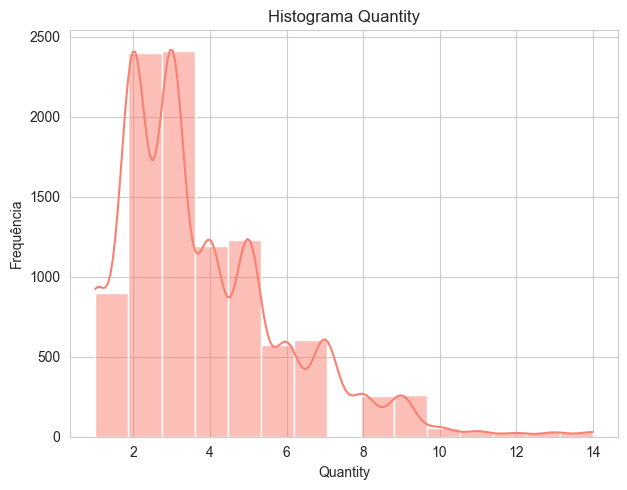

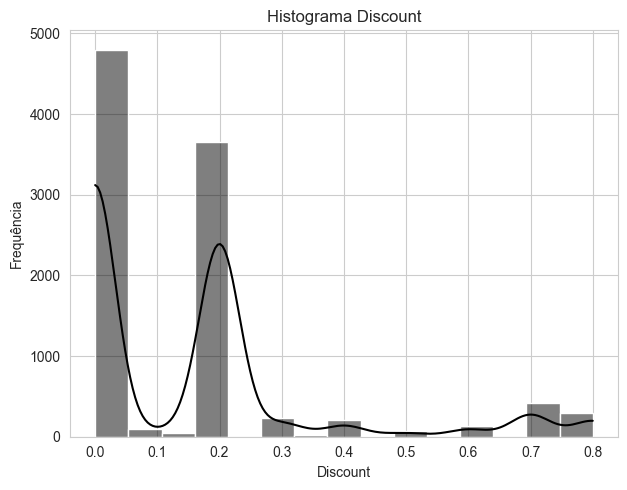

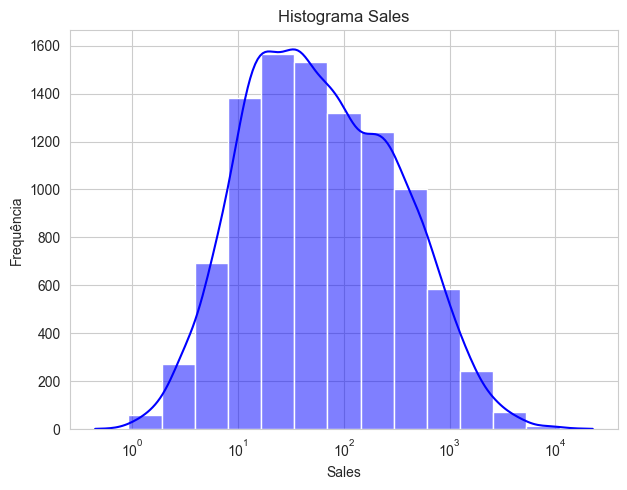

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


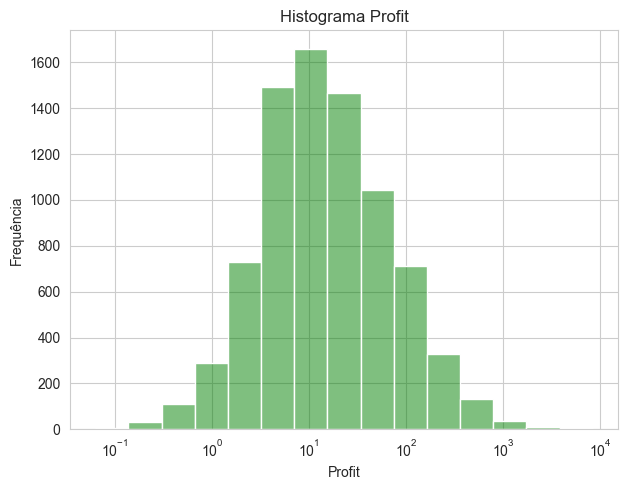

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=15, kde=True, color='salmon')
plt.title('Histograma Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Discount'], bins=15, kde=True, color='black')
plt.title('Histograma Discount')
plt.xlabel('Discount')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Alteramos para escala logaritmica para uma melhor visualização
plt.subplot(1, 2, 2)
sns.histplot(df['Sales'], bins=15, kde=True, color='blue', log_scale=True)
plt.title('Histograma Sales')
plt.xlabel('Sales')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Alteramos para escala logaritmica para uma melhor visualização
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=15, kde=True, color='green', log_scale=True)
plt.title('Histograma Profit')
plt.xlabel('Profit')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplot das variáveis

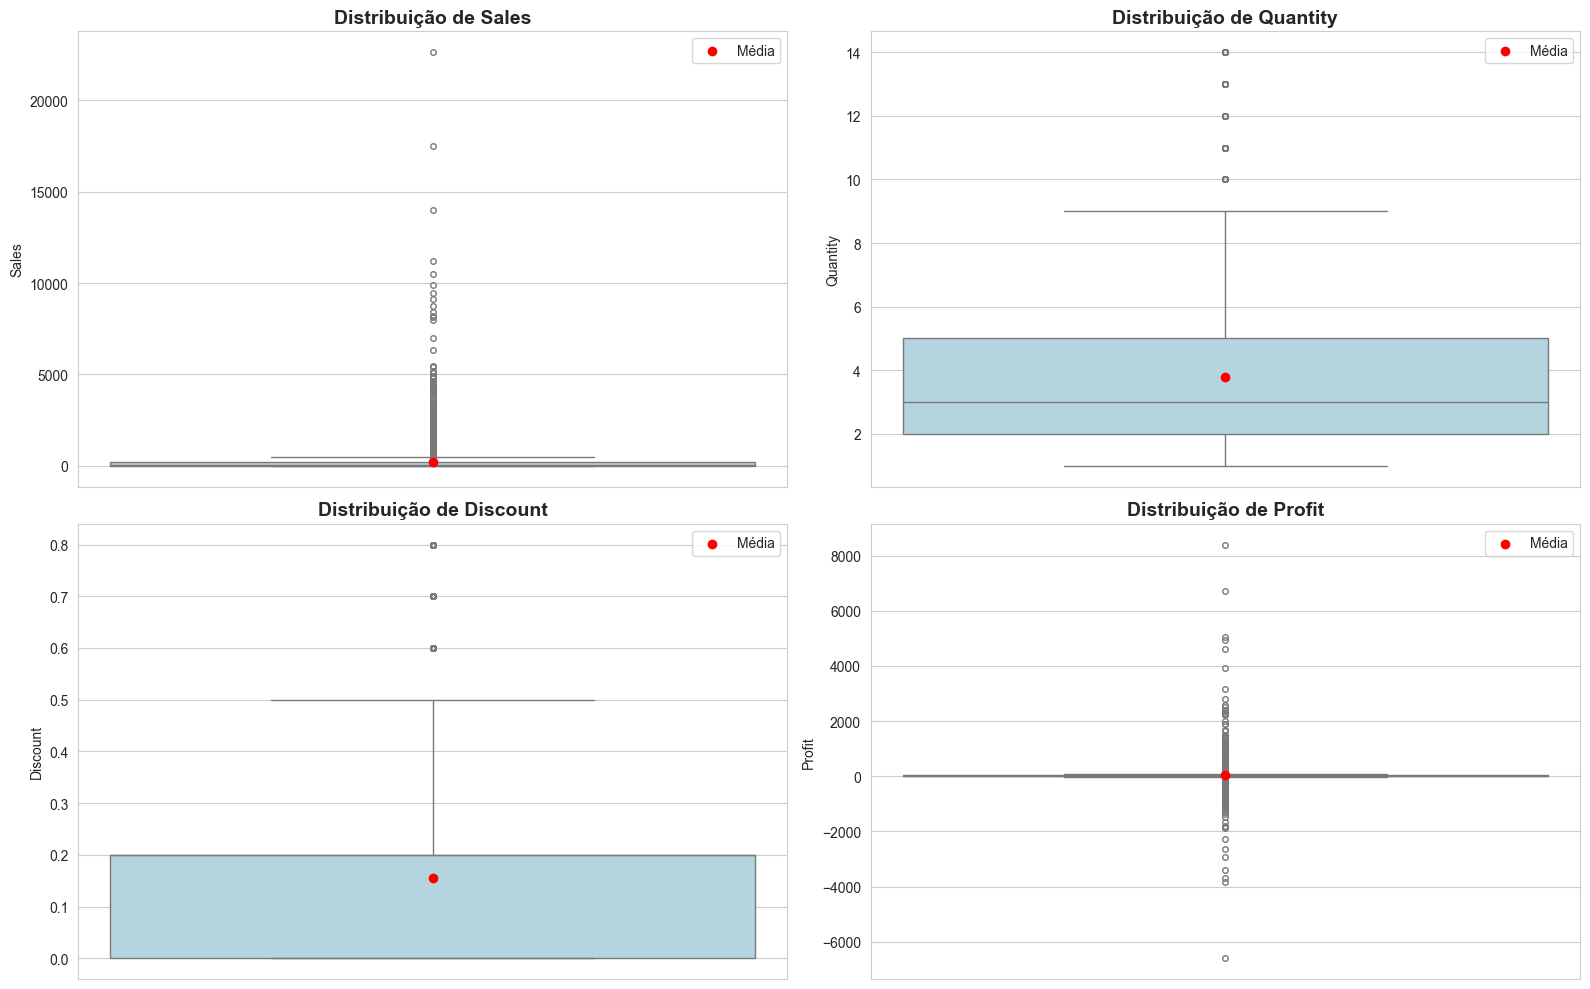

In [38]:
# Definir estilo
sns.set_style("whitegrid")

# Lista de variáveis
variaveis = ["Sales", "Quantity", "Discount", "Profit"]

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Plotar boxplots
for i, var in enumerate(variaveis):
    sns.boxplot(data=df, y=var, ax=axes[i], color='lightblue', width=0.4, fliersize=4)
    mean_val = df[var].mean()
    
    # Adicionar ponto da média
    axes[i].scatter(0, mean_val, color='red', zorder=5, label='Média')
    
    axes[i].set_title(f'Distribuição de {var}', fontsize=14, weight='bold')
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Matriz de Correlação entre variáveis númericas

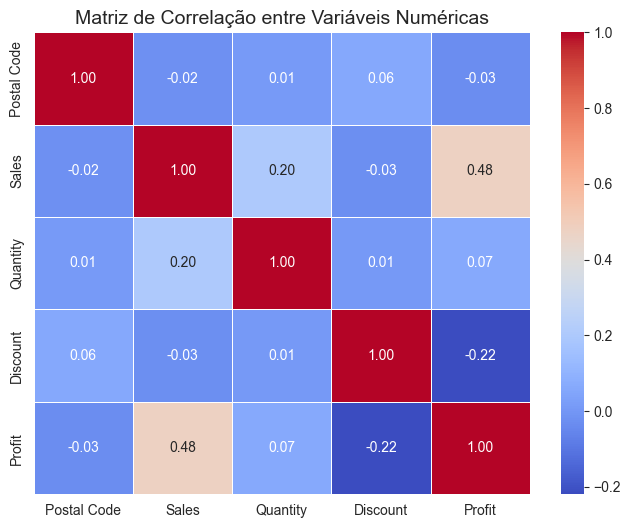

In [39]:
dados_numericos = df[["Postal Code", "Sales", "Quantity", "Discount", "Profit"]]

matriz_correlacao = dados_numericos.corr()

# Plotando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Matriz de Correlação entre Variáveis Numéricas", fontsize=14)
plt.show()

## Análise Interpretativa da Matriz
- Código Postal: Apresenta correlações próximas de zero com as demais variáveis, indicando que ele não influencia diretamente Vendas, Quantidade, Desconto ou Lucro.

- Vendas: Tem uma correlação positiva moderada com Lucro (0.48), sugerindo que quando as vendas aumentam, o lucro também tende a crescer. Além disso, há uma correlação positiva baixa com Quantidade (0.20).

- Quantidade: Exibe uma correlação positiva baixa com Vendas (0.20) e uma correlação muito fraca com Lucro (0.07), o que indica que vender mais unidades nem sempre significa maior lucro.

- Desconto: Apresenta uma correlação negativa baixa com Lucro (-0.22), sugerindo que descontos podem ter um impacto negativo no lucro, ainda que não seja uma relação forte.

- Lucro: Tem correlação positiva moderada com Vendas (0.48) e negativa baixa com Desconto (-0.22), reforçando a ideia de que vender mais tende a gerar mais lucro, enquanto dar descontos pode reduzi-lo.

# Gráfico de Dispersão

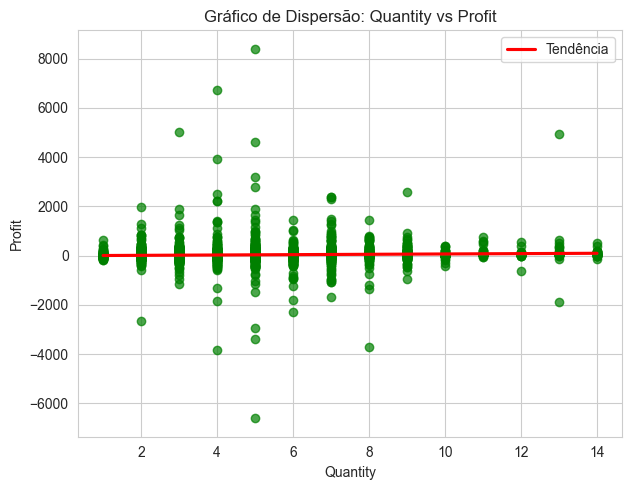

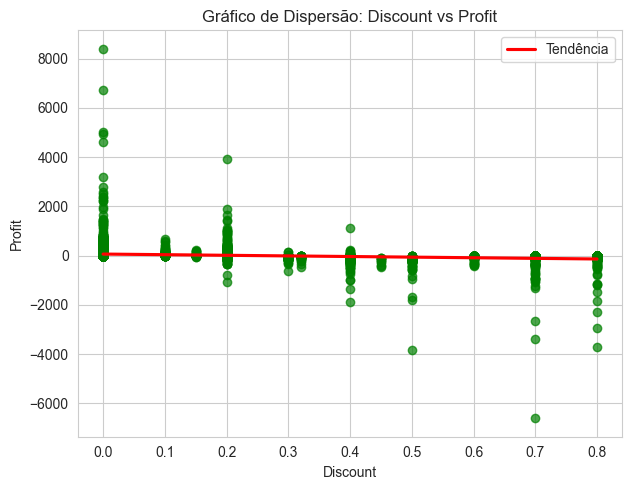

In [40]:
# Seaborn
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.regplot(x=df['Quantity'], y=df['Profit'], color='green', scatter_kws={'alpha':0.7},
            line_kws={'color':'red', 'label':'Tendência'})
plt.title('Gráfico de Dispersão: Quantity vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.regplot(x=df['Discount'], y=df['Profit'], color='green', scatter_kws={'alpha':0.7},
            line_kws={'color':'red', 'label':'Tendência'})
plt.title('Gráfico de Dispersão: Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de Dispersão em Logaritmo

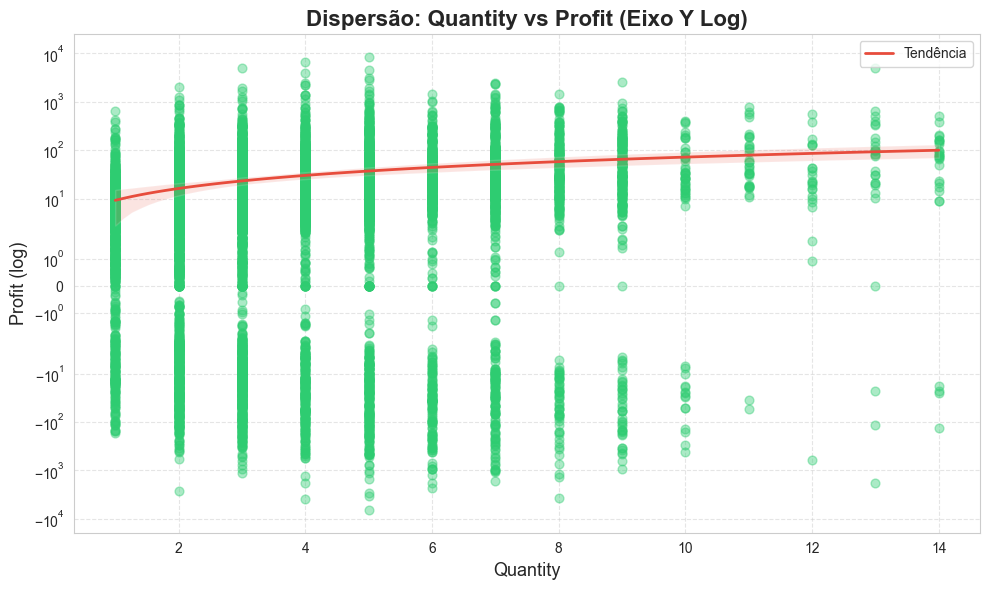

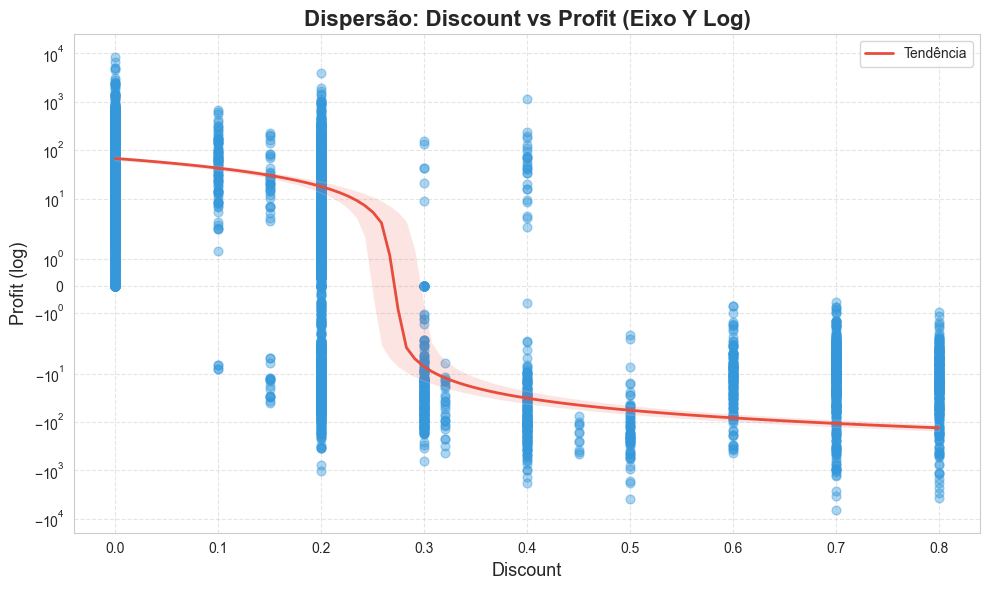

In [41]:
# Quantity vs Profit (escala log no eixo y)
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Quantity', y='Profit', data=df,
    scatter_kws={'alpha':0.4, 's':40, 'color':'#2ecc71'},
    line_kws={'color':'#e74c3c', 'label':'Tendência', 'lw':2}
)
plt.yscale('symlog')  # symlog permite valores negativos e positivos
plt.title('Dispersão: Quantity vs Profit (Eixo Y Log)', fontsize=16, weight='bold')
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('Profit (log)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Discount vs Profit (escala log no eixo y)
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Discount', y='Profit', data=df,
    scatter_kws={'alpha':0.4, 's':40, 'color':'#3498db'},
    line_kws={'color':'#e74c3c', 'label':'Tendência', 'lw':2}
)
plt.yscale('symlog')
plt.title('Dispersão: Discount vs Profit (Eixo Y Log)', fontsize=16, weight='bold')
plt.xlabel('Discount', fontsize=13)
plt.ylabel('Profit (log)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Análises Extras sobre os desafios do  Anexo I

## Categorias e Sub-categorias dos Produtos

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\460544462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='Set2')


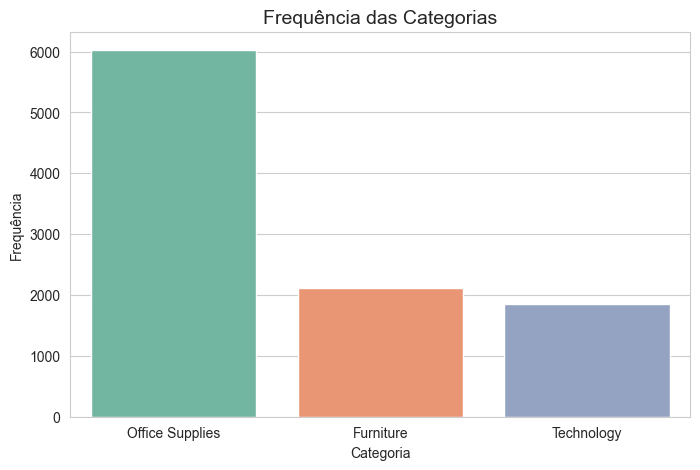

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\460544462.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sub-Category', order=df['Sub-Category'].value_counts().index, palette='Set3')


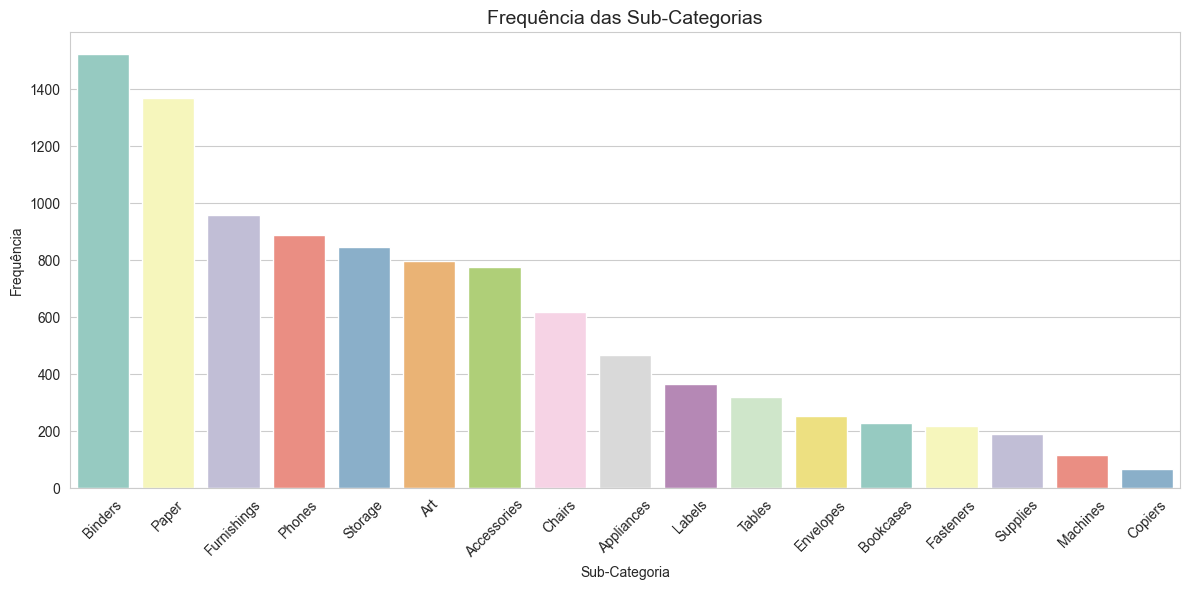

           Category Sub-Category
0         Furniture    Bookcases
1         Furniture       Chairs
2         Furniture  Furnishings
3         Furniture       Tables
4   Office Supplies   Appliances
5   Office Supplies          Art
6   Office Supplies      Binders
7   Office Supplies    Envelopes
8   Office Supplies    Fasteners
9   Office Supplies       Labels
10  Office Supplies        Paper
11  Office Supplies      Storage
12  Office Supplies     Supplies
13       Technology  Accessories
14       Technology      Copiers
15       Technology     Machines
16       Technology       Phones


In [42]:
# Gráfico de frequência das categorias
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='Set2')
plt.title('Frequência das Categorias', fontsize=14)
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.show()

# Gráfico de frequência das sub-categorias
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sub-Category', order=df['Sub-Category'].value_counts().index, palette='Set3')
plt.title('Frequência das Sub-Categorias', fontsize=14)
plt.xlabel('Sub-Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibir sub-categorias e suas respectivas categorias, organizadas por categoria
sub_categorias = df[['Category', 'Sub-Category']].drop_duplicates().sort_values(['Category', 'Sub-Category'])
print(sub_categorias.reset_index(drop=True))

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\1544024000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_categoria.index, y=lucro_categoria.values, palette='viridis')


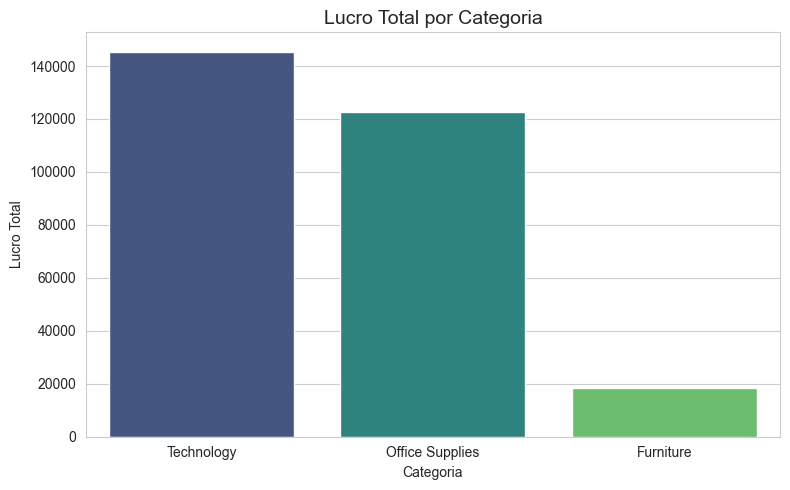

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\1544024000.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_subcategoria.index, y=lucro_subcategoria.values, palette='magma')


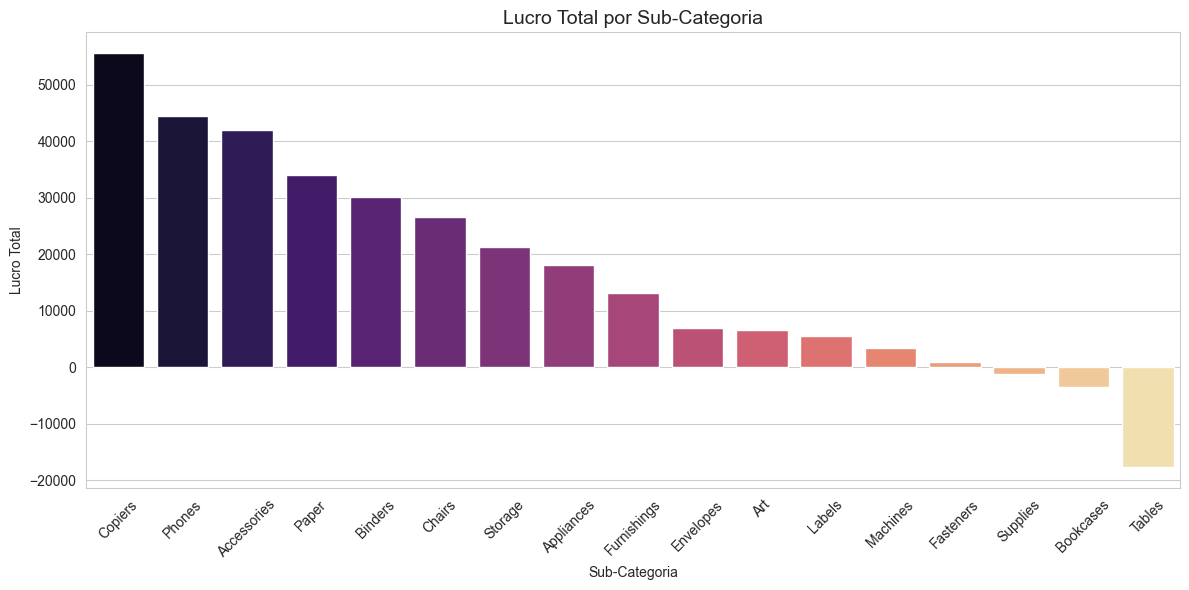

In [43]:
# Lucro total por categoria
lucro_categoria = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_categoria.index, y=lucro_categoria.values, palette='viridis')
plt.title('Lucro Total por Categoria', fontsize=14)
plt.xlabel('Categoria')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

# Lucro total por sub-categoria
lucro_subcategoria = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=lucro_subcategoria.index, y=lucro_subcategoria.values, palette='magma')
plt.title('Lucro Total por Sub-Categoria', fontsize=14)
plt.xlabel('Sub-Categoria')
plt.ylabel('Lucro Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observações em relação as categorias e sub-categorias
- Podemos reparar que a sub-categoria "Copiers" é a com menor frequência nas vendas, contudo ela é a que está na frente disparado na questão de lucro. Com isso, é possível perceber que os outliers de Profit estão em sua grande maioria na categoria de Tecnologia e principalmente em Copiers
- Observamos também a sub-categoria que está causando um grande outlier negativo no Profit(lucro), que é a sub-categoria Tables que está presente na categoria Furniture. Sendo este um ponto que deve ser analisado para futuras conclusões do projeto

## Desafio de análise 1
- Identificar produtos e segmentos com maior margem de lucro.

                                           Product Name         Category  \
6826              Canon imageCLASS 2200 Advanced Copier       Technology   
8153              Canon imageCLASS 2200 Advanced Copier       Technology   
4190              Canon imageCLASS 2200 Advanced Copier       Technology   
9039   GBC Ibimaster 500 Manual ProClick Binding System  Office Supplies   
4098               Ibico EPK-21 Electric Binding System  Office Supplies   
2623              Canon imageCLASS 2200 Advanced Copier       Technology   
509   Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
8488  HP Designjet T520 Inkjet Large Format Printer ...       Technology   
7666               Hewlett Packard LaserJet 3310 Copier       Technology   
6520          GBC DocuBind P400 Electric Binding System  Office Supplies   

     Sub-Category     Profit      Sales  Discount   Region  
6826      Copiers  8399.9760  17499.950       0.0  Central  
8153      Copiers  6719.9808  13999.960  

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\2356677721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


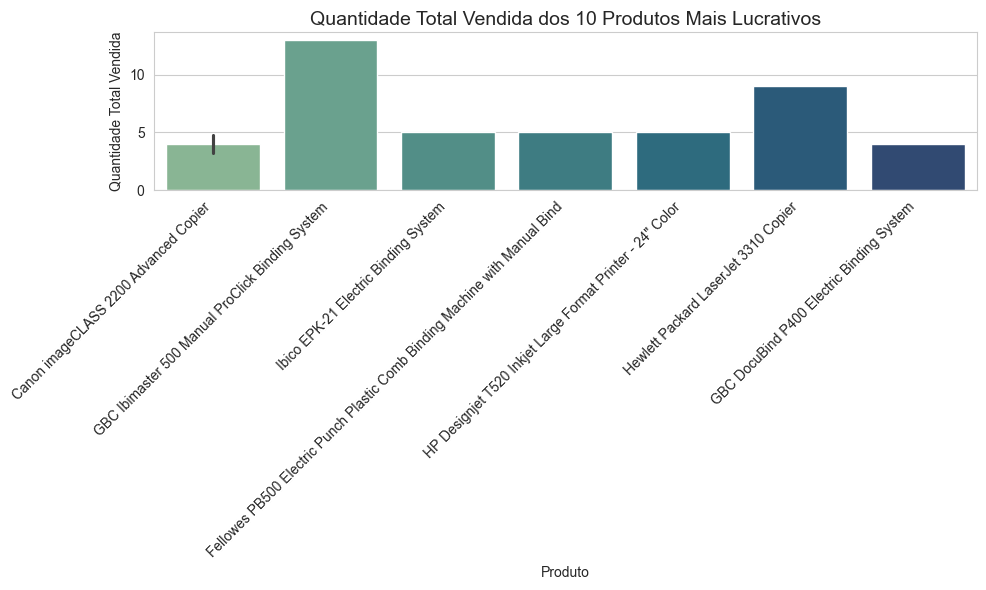

                                           Product Name         Category  \
1640              Canon imageCLASS 2200 Advanced Copier       Technology   
787   Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
1630               Hewlett Packard LaserJet 3310 Copier       Technology   
1637                 Canon PC1060 Personal Laser Copier       Technology   
1657  HP Designjet T520 Inkjet Large Format Printer ...       Technology   
1693                  Ativa V4110MDD Micro-Cut Shredder       Technology   
1656   3D Systems Cube Printer, 2nd Generation, Magenta       Technology   
1541  Plantronics Savi W720 Multi-Device Wireless He...       Technology   
692                Ibico EPK-21 Electric Binding System  Office Supplies   
1643                  Zebra ZM400 Thermal Label Printer       Technology   

     Sub-Category      Profit  
1640      Copiers  25199.9280  
787       Binders   7753.0390  
1630      Copiers   6983.8836  
1637      Copiers   4570.9347  
165

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\2356677721.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


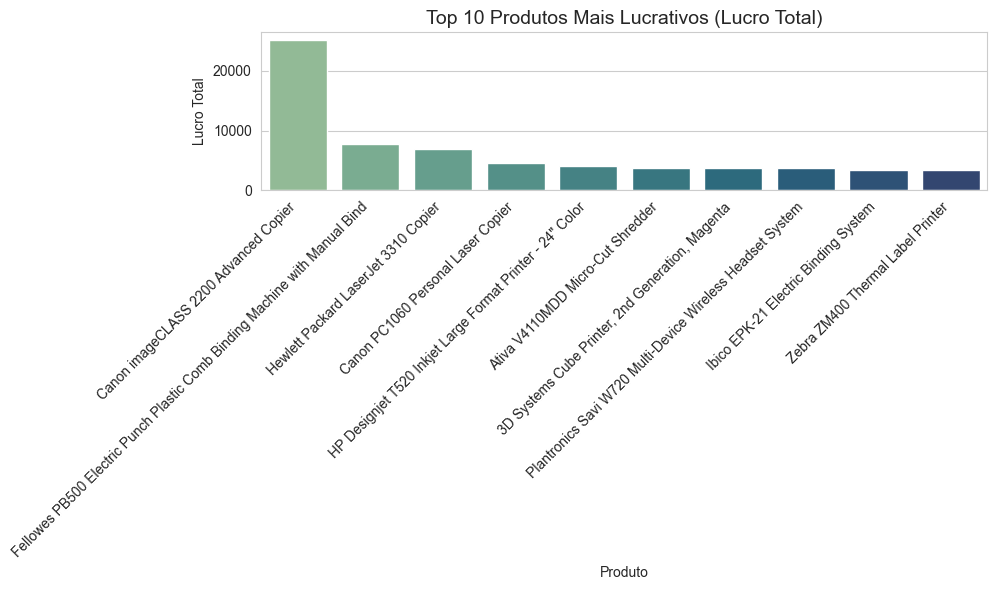

In [44]:
# Exibir os 10 produtos com maior lucro
produtos_maior_lucro = df.sort_values(by='Profit', ascending=False).head(10)
print(produtos_maior_lucro[['Product Name', 'Category', 'Sub-Category', 'Profit', 'Sales', "Discount", 'Region']])

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Product Name',
    y='Quantity',
    data=produtos_maior_lucro,
    palette='crest'
)
plt.title('Quantidade Total Vendida dos 10 Produtos Mais Lucrativos', fontsize=14)
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calcular o lucro total por produto (somando todas as vendas de cada produto)
lucro_total_produto = df.groupby(['Product ID', 'Product Name', 'Category', 'Sub-Category'], as_index=False)['Profit'].sum()

# Selecionar os 10 produtos com maior lucro total
produtos_mais_lucrativos = lucro_total_produto.sort_values(by='Profit', ascending=False).head(10)

print(produtos_mais_lucrativos[['Product Name', 'Category', 'Sub-Category', 'Profit']])

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Product Name',
    y='Profit',
    data=produtos_mais_lucrativos,
    palette='crest'
)
plt.title('Top 10 Produtos Mais Lucrativos (Lucro Total)', fontsize=14)
plt.xlabel('Produto')
plt.ylabel('Lucro Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
# Obter os Product ID dos produtos mais lucrativos
ids_mais_lucrativos = produtos_maior_lucro['Product ID'].unique()

# Filtrar todos os registros do dataframe original com esses Product ID
produtos_relacionados = df[df['Product ID'].isin(ids_mais_lucrativos)]

# Exibir os resultados
print(produtos_relacionados[['Product ID', 'Product Name', 'Category', 'Sub-Category', 'Profit', 'Sales', 'Discount', 'Quantity', 'Segment', 'Customer Name']].sort_values('Profit', ascending=False))

           Product ID                                       Product Name  \
6826  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
8153  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
4190  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
9039  OFF-BI-10000545   GBC Ibimaster 500 Manual ProClick Binding System   
4098  OFF-BI-10001120               Ibico EPK-21 Electric Binding System   
2623  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
509   OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
8488  TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Printer ...   
7666  TEC-CO-10001449               Hewlett Packard LaserJet 3310 Copier   
6520  OFF-BI-10004995          GBC DocuBind P400 Electric Binding System   
6626  TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Printer ...   
7683  OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
8858  OFF-BI

### Observações sobre os produtos mais lucrativos
- Os produtos mais lucrativos pertencem as Categorias Technology e Office Supplies, sendo o top 3 da sub-categoria Copiers pertencente a categoria Tecnologia
- Pegando de base os produtos mais lucrativos e procurando por todos os seus casos, percebemos que quando os descontos passam de 0.4 em sua maioria estando em 0.7 e 0.8, até para os produtos mais lucrativos se torna um prejuizo enorme

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


C:\Users\maria\AppData\Local\Temp\ipykernel_8048\2895479462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_por_segmento.index, y=lucro_por_segmento.values, palette='pastel')


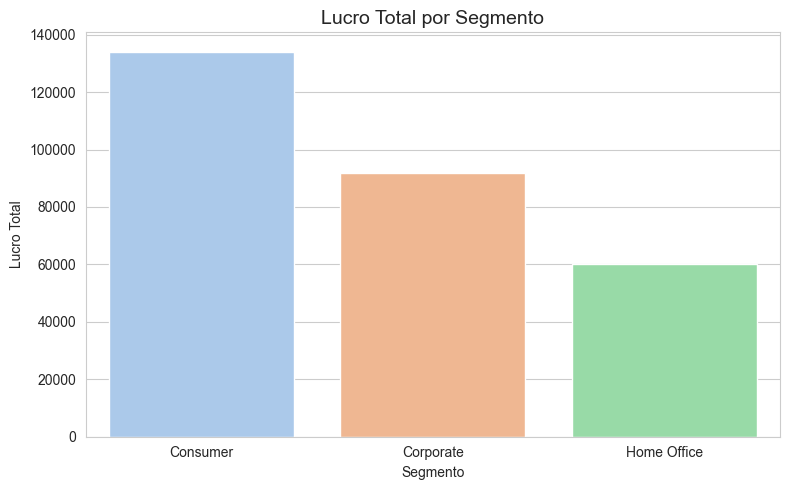

In [46]:
# Exibir o lucro total por segmento
lucro_por_segmento = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print(lucro_por_segmento)

plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_por_segmento.index, y=lucro_por_segmento.values, palette='pastel')
plt.title('Lucro Total por Segmento', fontsize=14)
plt.xlabel('Segmento')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

## Desafio de Análise 2
- Avaliar regiões ou clientes com baixa rentabilidade.

Lucro médio por Região:
Region
Central    17.092709
South      28.857673
East       32.135808
West       33.849032
Name: Profit, dtype: float64

Lucro médio por Estado (top 10 menores):
State
Ohio             -36.186304
Colorado         -35.867351
North Carolina   -30.083985
Tennessee        -29.189583
Pennsylvania     -26.507598
Texas            -26.121174
Illinois         -25.625787
Arizona          -15.303235
Oregon            -9.600569
Florida           -8.875461
Name: Profit, dtype: float64


C:\Users\maria\AppData\Local\Temp\ipykernel_8048\1266250203.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Profit', data=df, palette='pastel')


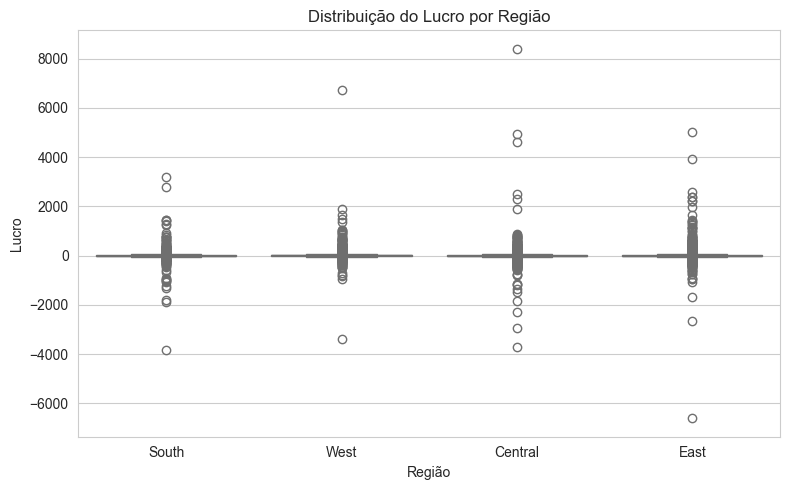

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\1266250203.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_total_regiao.index, y=lucro_total_regiao.values, palette='Greens')


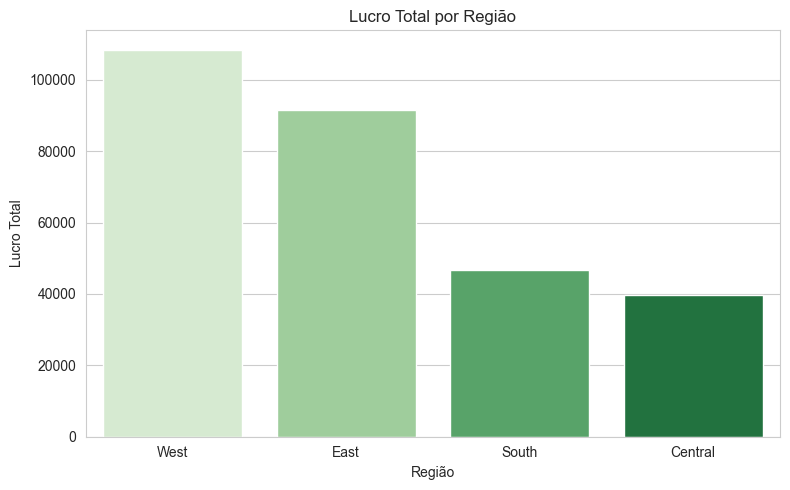

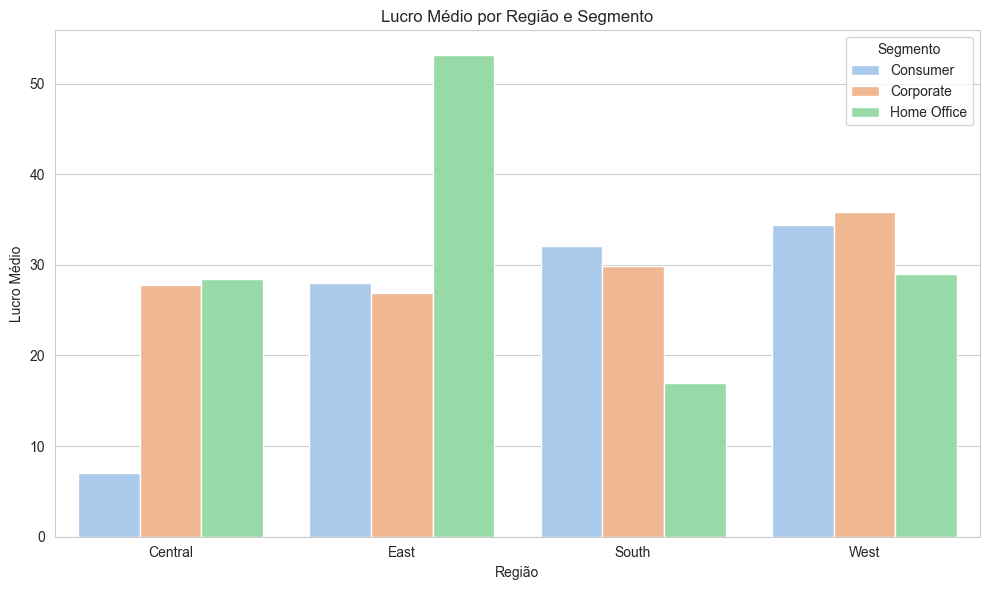

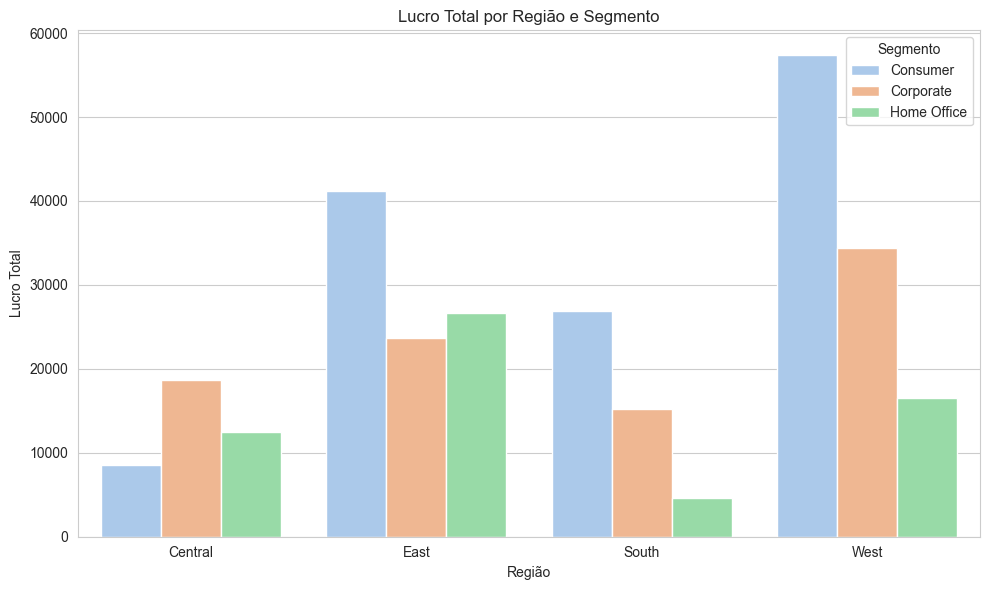

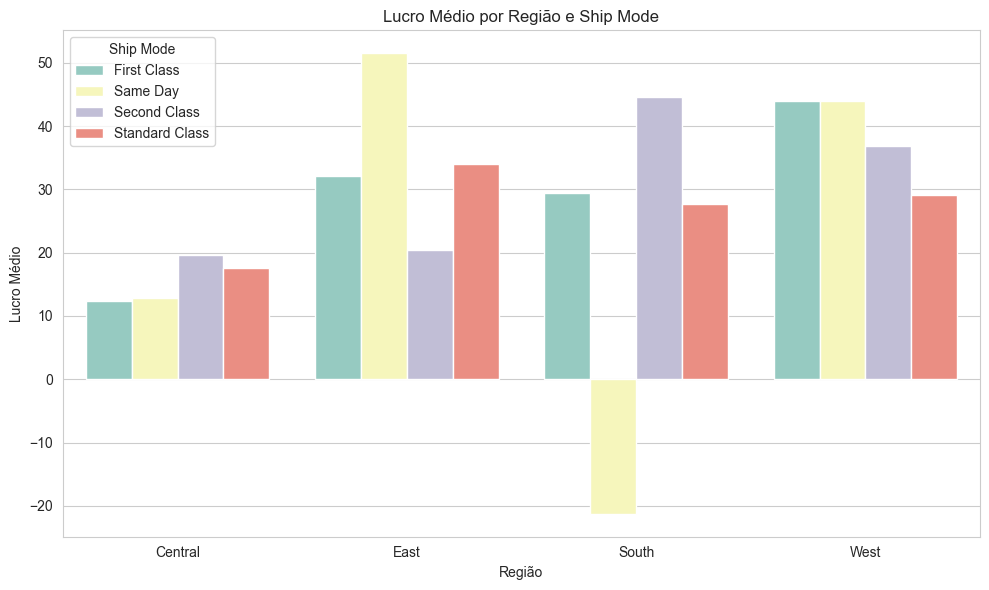

Região: South | Lucro médio: 28.86 | Desconto médio: 0.15
Região: West | Lucro médio: 33.85 | Desconto médio: 0.11
Região: Central | Lucro médio: 17.09 | Desconto médio: 0.24
Região: East | Lucro médio: 32.14 | Desconto médio: 0.15


In [47]:
# Análise de lucro por região e estado, considerando Ship Mode e Discount

# Lucro médio por região e estado
lucro_regiao = df.groupby('Region')['Profit'].mean().sort_values()
lucro_estado = df.groupby('State')['Profit'].mean().sort_values()

print("Lucro médio por Região:")
print(lucro_regiao)
print("\nLucro médio por Estado (top 10 menores):")
print(lucro_estado.head(10))

# boxplot de distribuição de lucro por região
plt.figure(figsize=(8, 5))
sns.boxplot(x='Region', y='Profit', data=df, palette='pastel')
plt.title('Distribuição do Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.tight_layout()
plt.show()

# Gráfico de barras do lucro total por região
lucro_total_regiao = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_total_regiao.index, y=lucro_total_regiao.values, palette='Greens')
plt.title('Lucro Total por Região')
plt.xlabel('Região')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

# Gráfico de barras do lucro médio por região e segmento
lucro_regiao_segmento = df.groupby(['Region', 'Segment'])['Profit'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', hue='Segment', data=lucro_regiao_segmento, palette='pastel')
plt.title('Lucro Médio por Região e Segmento')
plt.xlabel('Região')
plt.ylabel('Lucro Médio')
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

# Gráfico de barras do lucro total por região e segmento
lucro_total_regiao_segmento = df.groupby(['Region', 'Segment'])['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', hue='Segment', data=lucro_total_regiao_segmento, palette='pastel')
plt.title('Lucro Total por Região e Segmento')
plt.xlabel('Região')
plt.ylabel('Lucro Total')
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

# Gráfico de barras do lucro médio por região e Ship Mode
lucro_regiao_shipmode = df.groupby(['Region', 'Ship Mode'])['Profit'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', hue='Ship Mode', data=lucro_regiao_shipmode, palette='Set3')
plt.title('Lucro Médio por Região e Ship Mode')
plt.xlabel('Região')
plt.ylabel('Lucro Médio')
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

# Descrição interpretativa
for regiao in df['Region'].unique():
    media_lucro = df[df['Region'] == regiao]['Profit'].mean()
    media_desconto = df[df['Region'] == regiao]['Discount'].mean()
    print(f"Região: {regiao} | Lucro médio: {media_lucro:.2f} | Desconto médio: {media_desconto:.2f}")

### Observações em relação as regiões:
- Algumas regiões apresentam lucro médio menor, frequentemente associado a descontos mais altos ou uso de Ship Modes mais caros.
- Estados com menor lucro médio podem estar concentrados em regiões específicas, indicando desafios logísticos ou necessidade de promoções.
- O Ship Mode pode impactar o lucro, especialmente quando combinado com descontos frequentes.

## Desafio de Análise 3
- Detectar padrões sazonais e logísticos que impactam as vendas.

# Hipóteses

## Hipótese 1
- H₀ (Hipótese Nula):
    - Não há diferença significativa entre os lucros médios das categorias Technology e Office Supplies.
- H₁ (Hipótese Alternativa):
    - O lucro médio da categoria Technology é maior que o da categoria Office Supplies.


In [48]:
# Filtra apenas a categoria 'Technology'
tech_profit = df[df['Category'] == 'Technology']['Profit']

# Calcula quartis
Q1 = tech_profit.quantile(0.25)
Q3 = tech_profit.quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica outliers
outliers = tech_profit[(tech_profit < lower_limit) | (tech_profit > upper_limit)]
print(f"Número de outliers em 'Technology': {outliers.count()}")

Número de outliers em 'Technology': 250


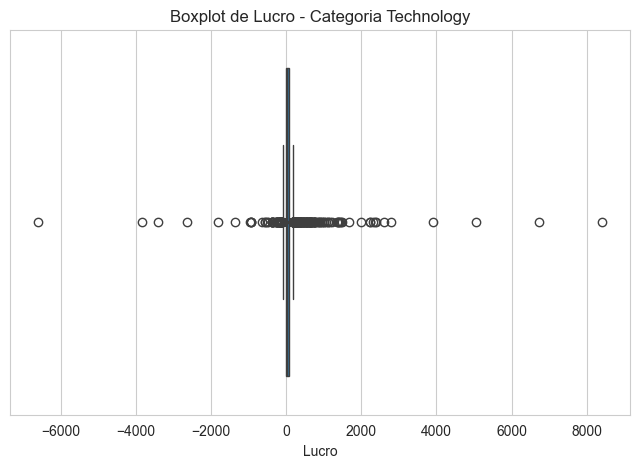

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[df['Category'] == 'Technology']['Profit'])
plt.title('Boxplot de Lucro - Categoria Technology')
plt.xlabel('Lucro')
plt.show()

In [50]:
# Remove outliers
tech_profit_sem_outliers = tech_profit[(tech_profit >= lower_limit) & (tech_profit <= upper_limit)]

In [51]:
# Winsoriza os dados
tech_profit_winsorized = np.clip(tech_profit, lower_limit, upper_limit)

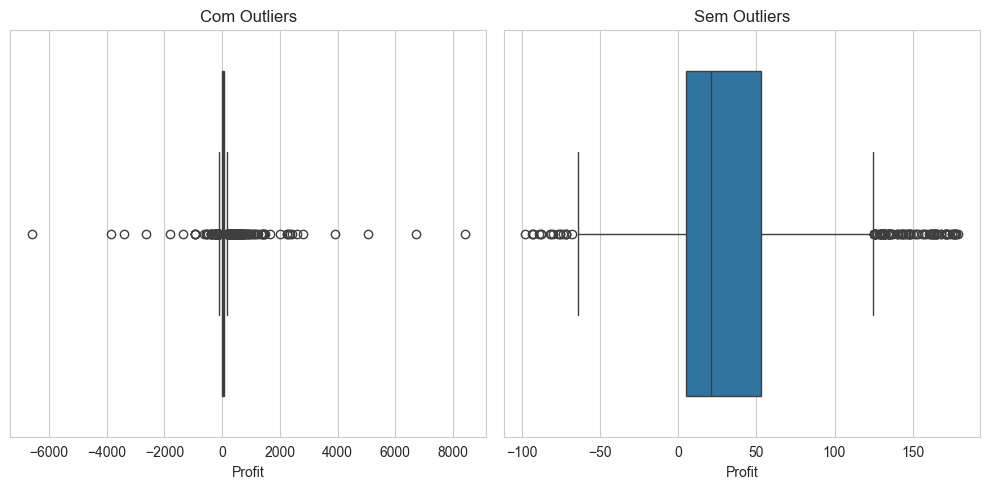

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\849590959.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_medio_com.index, y=lucro_medio_com.values, palette='Blues')


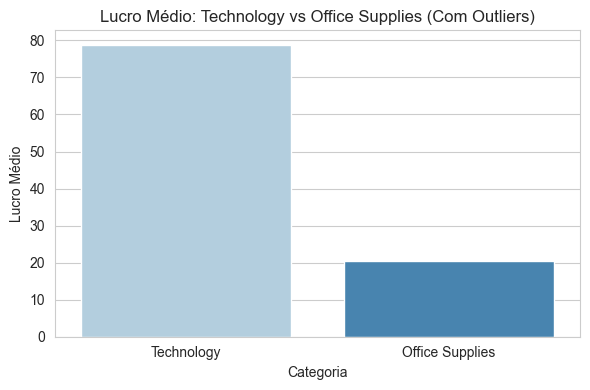

C:\Users\maria\AppData\Local\Temp\ipykernel_8048\849590959.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_medio_sem.index, y=lucro_medio_sem.values, palette='Greens')


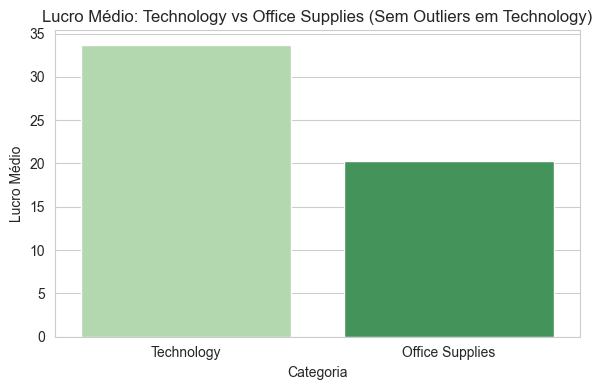

In [52]:
plt.figure(figsize=(10, 5))

# Com outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=tech_profit)
plt.title('Com Outliers')

# Sem outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=tech_profit_sem_outliers)
plt.title('Sem Outliers')

plt.tight_layout()
plt.show()

# Comparação do lucro médio entre Technology e Office Supplies
# Com outliers
lucro_medio_com = df[df['Category'].isin(['Technology', 'Office Supplies'])].groupby('Category')['Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=lucro_medio_com.index, y=lucro_medio_com.values, palette='Blues')
plt.title('Lucro Médio: Technology vs Office Supplies (Com Outliers)')
plt.xlabel('Categoria')
plt.ylabel('Lucro Médio')
plt.tight_layout()
plt.show()

# Sem outliers (apenas para Technology, Office Supplies permanece igual)
tech_sem_outliers = tech_profit_sem_outliers
off_profit = df[df['Category'] == 'Office Supplies']['Profit']

lucro_medio_sem = pd.Series({
    'Technology': tech_sem_outliers.mean(),
    'Office Supplies': off_profit.mean()
}).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=lucro_medio_sem.index, y=lucro_medio_sem.values, palette='Greens')
plt.title('Lucro Médio: Technology vs Office Supplies (Sem Outliers em Technology)')
plt.xlabel('Categoria')
plt.ylabel('Lucro Médio')
plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import shapiro

# Teste de normalidade Shapiro-Wilk para 'Profit' da categoria Technology

# Com outliers
stat_shapiro_com, p_shapiro_com = shapiro(tech_profit)
print(f"Shapiro-Wilk (com outliers): stat={stat_shapiro_com:.4f}, p-valor={p_shapiro_com:.4e}")

# Sem outliers
stat_shapiro_sem, p_shapiro_sem = shapiro(tech_profit_sem_outliers)
print(f"Shapiro-Wilk (sem outliers): stat={stat_shapiro_sem:.4f}, p-valor={p_shapiro_sem:.4e}")

if p_shapiro_com < 0.05:
    print("Com outliers: NÃO segue distribuição normal (p < 0.05)")
else:
    print("Com outliers: Segue distribuição normal (p >= 0.05)")

if p_shapiro_sem < 0.05:
    print("Sem outliers: NÃO segue distribuição normal (p < 0.05)")
else:
    print("Sem outliers: Segue distribuição normal (p >= 0.05)")

Shapiro-Wilk (com outliers): stat=0.2833, p-valor=1.4877e-64
Shapiro-Wilk (sem outliers): stat=0.9145, p-valor=4.2032e-29
Com outliers: NÃO segue distribuição normal (p < 0.05)
Sem outliers: NÃO segue distribuição normal (p < 0.05)


In [54]:
from scipy.stats import levene

# Teste de homogeneidade de variâncias (Levene) entre Technology e Office Supplies

# Com outliers
stat_lev_com, p_lev_com = levene(tech_profit, off_profit)
print(f"Levene (com outliers): stat={stat_lev_com:.4f}, p-valor={p_lev_com:.4e}")
if p_lev_com < 0.05:
    print("Com outliers: As variâncias NÃO são homogêneas (p < 0.05)")
else:
    print("Com outliers: As variâncias são homogêneas (p >= 0.05)")

# Sem outliers (apenas para Technology)
stat_lev_sem, p_lev_sem = levene(tech_profit_sem_outliers, off_profit)
print(f"Levene (sem outliers): stat={stat_lev_sem:.4f}, p-valor={p_lev_sem:.4e}")
if p_lev_sem < 0.05:
    print("Sem outliers: As variâncias NÃO são homogêneas (p < 0.05)")
else:
    print("Sem outliers: As variâncias são homogêneas (p >= 0.05)")

Levene (com outliers): stat=135.3825, p-valor=4.8833e-31
Com outliers: As variâncias NÃO são homogêneas (p < 0.05)
Levene (sem outliers): stat=0.9587, p-valor=3.2755e-01
Sem outliers: As variâncias são homogêneas (p >= 0.05)


In [55]:
from scipy.stats import mannwhitneyu

# Dados de Office Supplies
off_profit = df[df['Category'] == 'Office Supplies']['Profit']

# Teste com outliers
stat_com, p_com = mannwhitneyu(tech_profit, off_profit)
print(f'Com Outliers: U={stat_com}, p-valor={p_com}')

# Teste sem outliers
stat_sem, p_sem = mannwhitneyu(tech_profit_sem_outliers, off_profit)
print(f'Sem Outliers: U={stat_sem}, p-valor={p_sem}')

Com Outliers: U=7338326.0, p-valor=1.2105296994723003e-95
Sem Outliers: U=6163217.0, p-valor=6.252734129073923e-67


## Conclusão
- Os testes realizados comprovam que existe, sim, uma diferença estatística altamente significativa no lucro médio entre as categorias 'Technology' e 'Office Supplies'.
- A categoria 'Technology' apresenta lucros medianos superiores quando comparada à categoria 'Office Supplies', tanto com quanto sem a presença de outliers.
- A análise de variância demonstrou que os outliers em 'Technology' impactam fortemente a dispersão dos dados, tornando as variâncias heterogêneas. Contudo, a retirada dos outliers resolve esse problema, embora a distribuição dos dados continue não normal.
- Dessa forma, o teste de Mann-Whitney foi corretamente aplicado como método robusto e confiável para esse cenário.

#  Regressão linear simples com uma variável independente

MSE: 87038.83
R²: -0.80
RMSE: 295.02


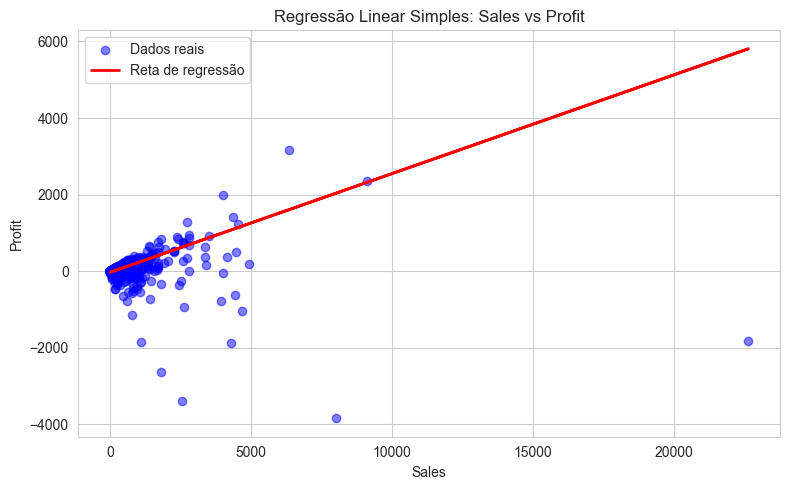

In [59]:
# Regressão Linear Simples: Qual a precisão de estimar o lucro médio (Profit) pelo valor de vendas (Sales)?

# Selecionar as variáveis
X = df[['Sales']]  # Variável independente
y = df['Profit']   # Variável dependente

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

# Visualizar a reta de regressão
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Reta de regressão')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Regressão Linear Simples: Sales vs Profit')
plt.legend()
plt.tight_layout()
plt.show()


## Conclusão sobre a Regressão Linear

- A regressão linear simples realizada entre as variáveis **Sales** (Valor da Venda) e **Profit** (Lucro) mostrou que, apesar de existir uma relação positiva entre o valor da venda e o lucro, o modelo apresenta baixo poder preditivo para estimar o lucro a partir do valor da venda. Isso é evidenciado pelo valor negativo do R² (-0.80), indicando que o modelo não consegue explicar a variabilidade do lucro com base apenas no valor da venda.
- Esse resultado sugere que o lucro é influenciado por outros fatores além do valor da venda, como descontos aplicados, quantidade vendida, categoria do produto e outros aspectos operacionais. 
- Em resumo, a análise reforça que, no contexto do negócio, aumentar o valor das vendas nem sempre garante aumento proporcional do lucro, sendo fundamental analisar outros fatores que impactam a rentabilidade.